# WE05-CNN Basic classification: Classify images of clothing

### Importing necessary packages

In [1]:
import numpy as np
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

np.random.seed(1)

## Importing the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

### Splitting data for train dataset and test dataset

In [2]:
df = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = df.load_data()

Loading the dataset returns four NumPy arrays:

* The `X_train` and `y_train` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `X_test`, and `y_test` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_indices = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring the data

Exploring the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
X_train.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
y_train.shape

(60000,)

Each label is an integer between 0 and 9:

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
X_test.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
y_test.shape

(10000,)

## Preprocess the data

The data will be preprocessed before training the network. Inspecting the first image in the training set.

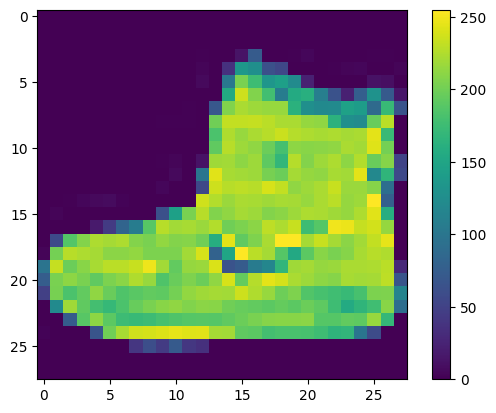

In [9]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scaling these values to a range of 0 to 1 before feeding them to the neural network model.

In [10]:
X_train = X_train / 255.0

X_test = X_test / 255.0

Displaying the first 25 images from the *training set* and displaying the class name below each image.

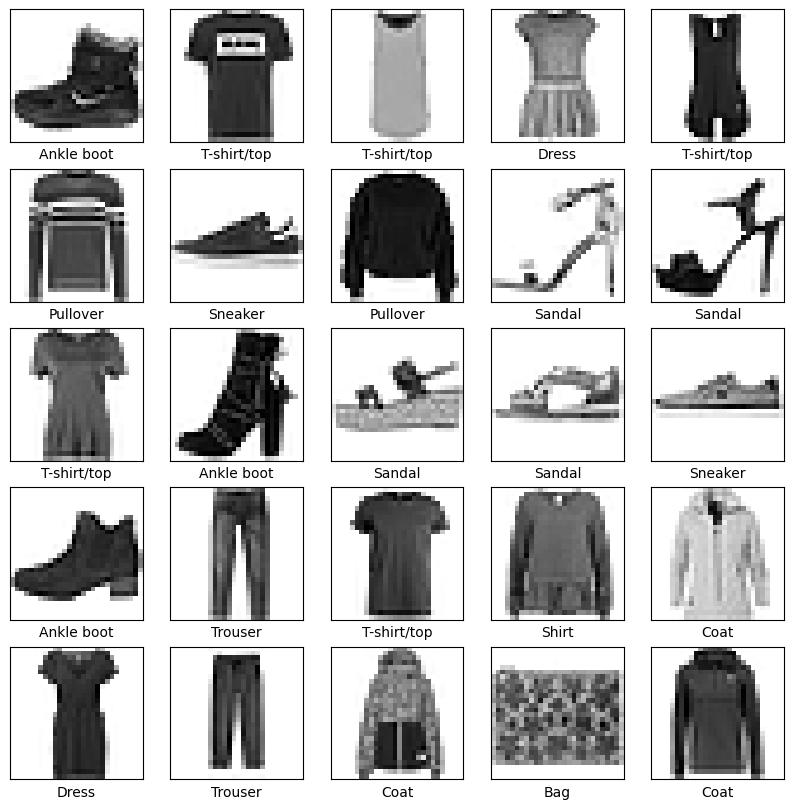

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_indices[y_train[i]])
plt.show()

### Building the model

Building the neural network requires configuring the layers of the model, then compiling the model.

#### Set up the layers


In [12]:

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compiling the model


In [13]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Training the model

Training the neural network model requires the following steps:


In [14]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
1875/1875 [==============================] - 100s 52ms/step - loss: 0.4378 - accuracy: 0.8419 - val_loss: 0.3860 - val_accuracy: 0.8610
Epoch 2/100
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2899 - accuracy: 0.8941 - val_loss: 0.2948 - val_accuracy: 0.8950
Epoch 3/100
1875/1875 [==============================] - 95s 51ms/step - loss: 0.2469 - accuracy: 0.9094 - val_loss: 0.2877 - val_accuracy: 0.8941
Epoch 4/100
1875/1875 [==============================] - 95s 50ms/step - loss: 0.2134 - accuracy: 0.9208 - val_loss: 0.2441 - val_accuracy: 0.9098
Epoch 5/100
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1873 - accuracy: 0.9297 - val_loss: 0.2508 - val_accuracy: 0.9104
Epoch 6/100
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1642 - accuracy: 0.9380 - val_loss: 0.2496 - val_accuracy: 0.9106
Epoch 7/100
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1454 - accuracy: 0.9449 - val_loss: 

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [35]:
val_loss, val_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nValidation loss:', val_loss)
print('\nValidation accuracy:', val_acc)

313/313 - 3s - loss: 1.5691 - accuracy: 0.9037 - 3s/epoch - 10ms/step

Validation loss: 1.5691207647323608

Validation accuracy: 0.9036999940872192


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.9 (or 90%) on the training data.

In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Plots for model accuracy and model loss

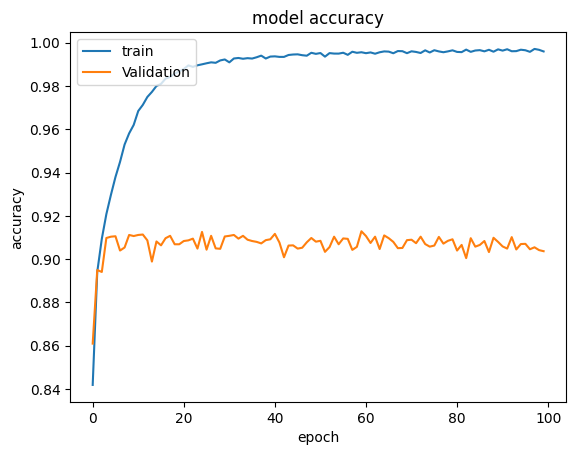

In [44]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


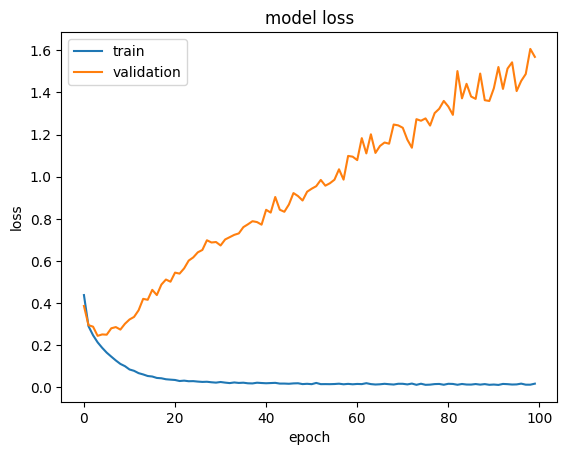

In [45]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Making predictions

In [18]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [20]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931],
      dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.

In [21]:
np.argmax(predictions[0])

9

In [22]:
y_test[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_indices[predicted_label],
                                100*np.max(predictions_array),
                                class_indices[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verifying predictions

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

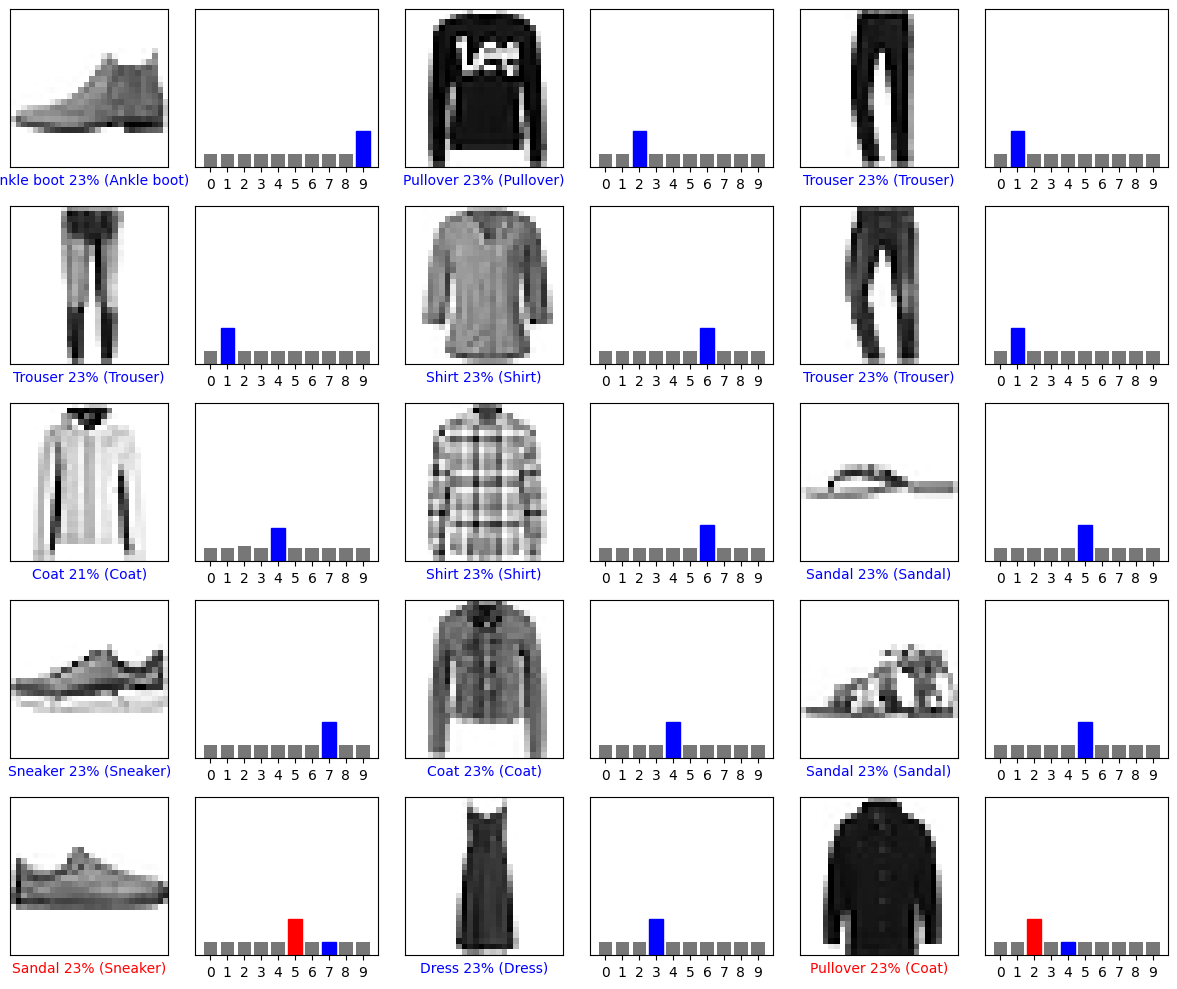

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

## Using the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = X_test[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


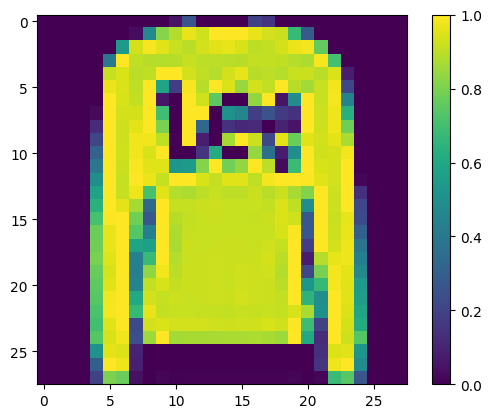

In [43]:
plt.figure()
plt.imshow(X_test[1])
plt.colorbar()
plt.grid(False)
plt.show()

Now predicting the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[0.08533674 0.08533674 0.23196931 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]]


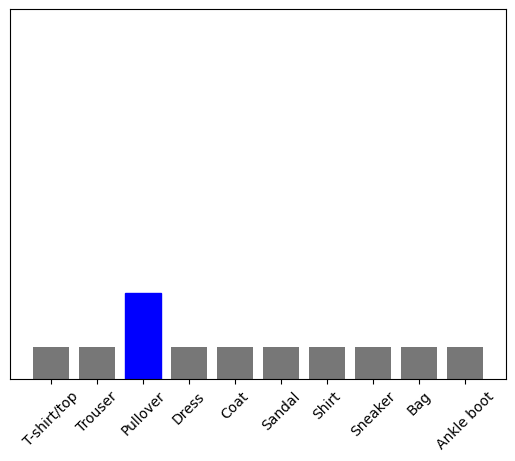

In [31]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_indices, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2

## The prediction is correct. The model predicted that it is a pullover

### Evaluating the model using confusion matrix

313/313 [==============================] - 4s 11ms/step


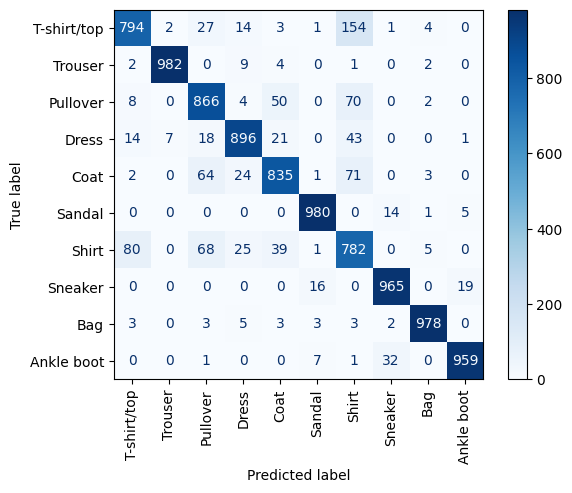

In [34]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
print(classification_report(y_test, y_pred, target_names=class_indices, digits=4))

              precision    recall  f1-score   support

 T-shirt/top     0.8793    0.7940    0.8345      1000
     Trouser     0.9909    0.9820    0.9864      1000
    Pullover     0.8271    0.8660    0.8461      1000
       Dress     0.9171    0.8960    0.9064      1000
        Coat     0.8743    0.8350    0.8542      1000
      Sandal     0.9713    0.9800    0.9756      1000
       Shirt     0.6951    0.7820    0.7360      1000
     Sneaker     0.9517    0.9650    0.9583      1000
         Bag     0.9829    0.9780    0.9805      1000
  Ankle boot     0.9746    0.9590    0.9667      1000

    accuracy                         0.9037     10000
   macro avg     0.9064    0.9037    0.9045     10000
weighted avg     0.9064    0.9037    0.9045     10000



### Conclusion

The images were preprocessed and the pixel values were normalized to fall in the range between 0 and 1. The model consists of an input layer that flattens the 2D array of pixels into a 1D array, followed by a dense hidden layer with 128 neurons using a ReLU (Rectified Linear Unit) activation function, and finally a 10-neuron softmax output layer, each neuron corresponding to one of the 10 classes of clothing.

I used the Adam optimization algorithm during the training process, along with the sparse categorical cross entropy loss function because our labels are integers. We also kept track of the accuracy metric during the training process.

After 100 epochs of training, our model was able to classify the clothing images with a certain accuracy. This accuracy level can be seen as a starting point, but there's potential for improvement.

The model's prediction results are in the form of confidence scores for each of the 10 classes. The predicted class corresponds to the one with the highest confidence score.

I got a good accuracy and according to plots, it appears that the model's training accuracy is increasing over time, and the training loss is decreasing over time, which is a good sign. It suggests that the model is learning from the training data.

However, the validation loss seems to be increasing after a certain number of epochs, and the validation accuracy doesn't seem to be increasing much after initial few epochs. This is a sign of overfitting - the model is getting better at predicting the training data, but it's not improving its performance on unseen (validation) data. It's just learning the specifics of the training data, rather than the general underlying patterns.

The model correctly predicted class 0 (T-shirt/top) 794 times, class 1 (Trouser) 982 times.

Interpreting confusion matrix:

The model performs extremely well with Trouser (class 1), Sandal (class 5), and Bag (class 8) with the highest TP rates and fewer misclassifications.
T-shirt/top (class 0) and Shirt (class 6) seem to be frequently confused, indicating that the model has difficulty distinguishing between these two classes.
There are also a considerable amount of misclassifications between Pullover (class 2) and Coat (class 4), but still our model prdicted pullover correctly.

Cost of having TP, FP, TN, FN in fashion-related business:

True Positives (TP): The model correctly predicts the class of the clothing item. The cost is generally beneficial here. The system works as intended, leading to correct automation decisions, improved customer experience, efficient inventory management, etc.

True Negatives (TN): The model correctly predicts that an item does not belong to a certain class. This is also beneficial as it avoids misclassifications and the potential costs associated with them.

False Positives (FP): The model incorrectly identifies an item as belonging to a class it doesn't. This could lead to several potential costs. For instance, in an automated inventory system, it might incorrectly categorize products, leading to errors in stock control. In a recommendation system, it might show users inappropriate item suggestions, potentially impacting user experience and trust.

False Negatives (FN): The model fails to identify an item as belonging to a specific class when it does. This could also lead to potential costs. For example, an item might not show up in the appropriate category in an online shop, leading to lost sales opportunities. In a recommendation system, it could miss out on showing a user an item they would be interested in.

In this case it is important to have good accuracy. In conclusion my model did pretty good in terms of accuracy.

